In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [2]:
x = np.random.random_sample((10,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
x = np.append(x, np.random.normal(0, 40, 30))


y = np.random.random_sample((10,)) * 90  
for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))

y = np.append(y, np.random.normal(0, 40, 30))

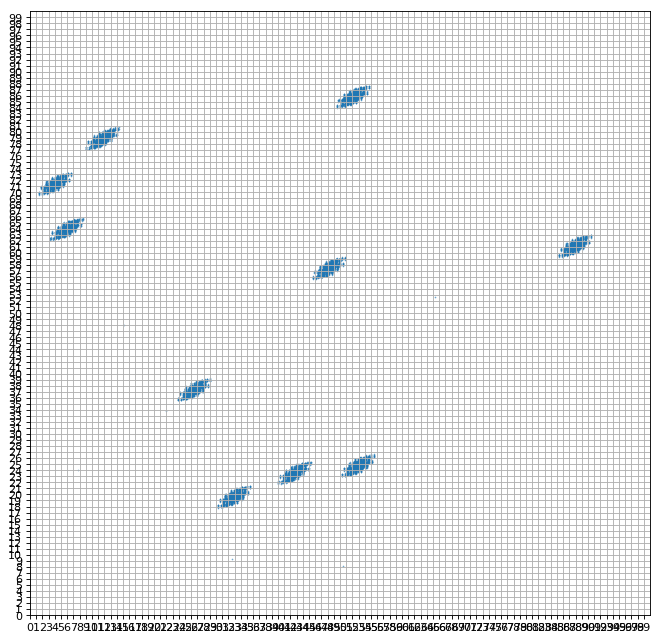

In [3]:
# This part is  a visualization only 
grid_size= 1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.1)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

In [4]:
cellSize=1
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
xTransformed = x - x1
print(x.size)

# print(xTransformed.size)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
# print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
# agg = np.column_stack((xTransformed, yTransformed))
# print(agg)


# np.array(setAgg[:,0], setAgg[:,1])

# setAgg=np.unique(agg, axis=0)

# print(setAgg.size)
# print(setAgg)

# plt.scatter(setAgg[:,0], setAgg[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.show()

10270


In [5]:
all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

dictCount={} 

for i in all_tuples:
    if(i in dictCount):
        dictCount[i] += 1
    else:
        dictCount[i] = 1


# print(dictCount)
# print(dictCount.values())
# values = np.asarray(dictCount.values())

values = np.fromiter(dictCount.values(), dtype=int)
# print(values.shape)
# print(values)



keys = np.asarray(list(dictCount))
# print(keys)
print(keys.shape)

(215, 2)


In [6]:
# How to convert 

# https://stackoverflow.com/questions/23668509/dictionary-keys-and-values-to-separate-numpy-arrays
# Dictionary keys and values to separate numpy arrays
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)


values_cliped = (values - 30).clip(min=0)
print(values_cliped)


print(np.where( values_cliped !=0 ))



dataForClustering=keys[np.where( values_cliped !=0 )]
print(dataForClustering)


[  0   7   0   0   0   0   0   0   0   0   0   0   0  34  18  50  30   0
  63  18  26   0  61   0 102   5  84  29  26 103  60   0   0  88  31  39
  57   0   0  16   0 156   0   0   0   0  10   0  26  20 109  69  73 135
 176 188 119  45  51  78 162 174 184   0  88 114   0   0   0   0   0   0
   0  52 174   0   0  14   0   0   0   0   0   0   0  31  89  56  43 111
  88 158 179 162   0   8 151 107   3 133 103 129 148 143 160 131   0 114
 113  31  41  50  50  27  20   0  22  85  56   0  53  65  68  54  18   0
   0  67  88   0   0  39  36   0   0   0   0   0  39   0   0   0   0   0
   0   0   0   0   0  30  19  27  19   5  12   4   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(array([  1,  13,  14,  15,  16,  18,  19,  20,  22,  24,  25,  26,  27,
        28,  29,  30,  33,  34,  35,  36,  39,  41,  4

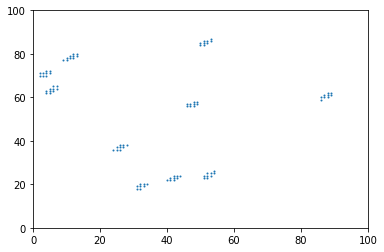

In [7]:
plt.scatter(dataForClustering[:,0], dataForClustering[:,1], s=1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

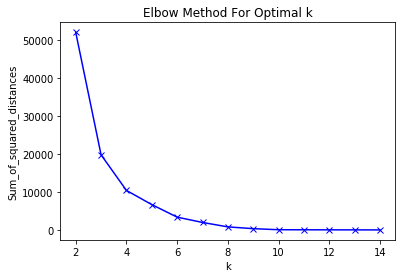

10
[[42.         23.        ]
 [ 3.55555556 70.88888889]
 [51.44444444 85.33333333]
 [87.55555556 60.66666667]
 [47.55555556 56.88888889]
 [26.         37.        ]
 [52.44444444 24.33333333]
 [11.3        78.5       ]
 [32.25       19.125     ]
 [ 5.5        63.5       ]]


In [8]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(dataForClustering)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.4 here is just a threshhold 
    if(ratio < 1.4):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(dataForClustering)
print(km.cluster_centers_)
